# Sentiment Analysis with TextBlob and Vader

## Imports

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# ran this to install
# nltk.download('vader_lexicon')


# to install textblob on windows, search and open "Anaconda Prompt"
# run the following command within the anaconda prompt:
# conda install -c conda-forge textblob
from textblob import TextBlob


## Dataframe Setup
Setup the dataframe with the imported json of tweets.  Includes the following columns:
*  **created_at**: timestamp
* **id_str**: the tweet's id on twitter
* **text**: the tweet text

Next we add two columns wthat we initialize from TextBlob
* **polarity**: Ranges from -1 - 1, where -1 is negative and 1 is positive
* **subjectivity**: Where 0 represents factually based language and 1 reprsents subjective-based language 

In [73]:
tweets_cleaned = None
with open('tweets_cleaned.json', encoding="utf8") as f:
  tweets_cleaned = json.load(f)

pd.set_option('max_colwidth', 300)
# pd.set_option('display.max_rows', 250)
tweets_cleaned_df = pd.DataFrame.from_dict(tweets_cleaned)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

tweets_cleaned_df['polarity'] = tweets_cleaned_df['text'].apply(pol)
tweets_cleaned_df['subjectivity'] = tweets_cleaned_df['text'].apply(sub)


## Scatterplots - TextBlob


### Coronavirus-related tweets

#### This scatter plot looks for any possible correlation between polarity and sentiment.
#### Nothing jumps out. The tweets also appear to be centrally located which is surprising

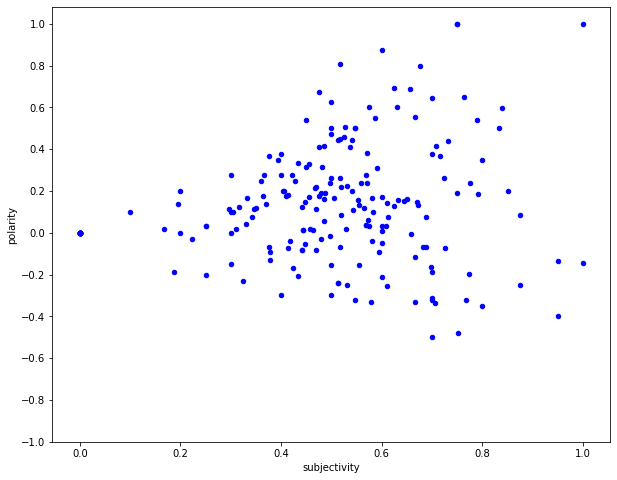

In [74]:
tweets_cleaned_df.plot(kind='scatter',x='subjectivity',y='polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

#### This scatter plot's X axis is the "id_str" field which is essentially putting the tweets in order. The tweets surprisingly appear to be consistent overtime

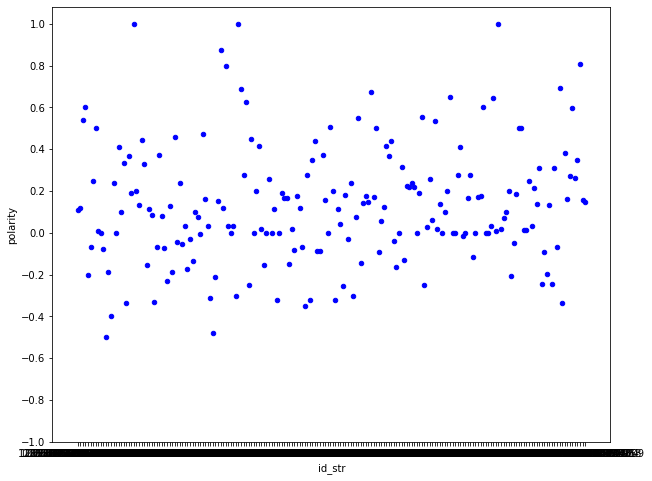

In [75]:
tweets_cleaned_df.plot(kind='scatter',x='id_str',y='polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

In [76]:
all_tweets = None
with open('Tweets_12-31-2019_05-27-2020_without-retweets.json', encoding="utf8") as f:
  all_tweets = json.load(f)

pd.set_option('max_colwidth', 300)

all_tweets_df = pd.DataFrame.from_dict(all_tweets)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

all_tweets_df['polarity'] = all_tweets_df['text'].apply(pol)
all_tweets_df['subjectivity'] = all_tweets_df['text'].apply(sub)

### All Tweets

#### This scatter plot is looking at all tweets and if there is a visually noticable correlation between polairty and subjectivity. It does not appear so.

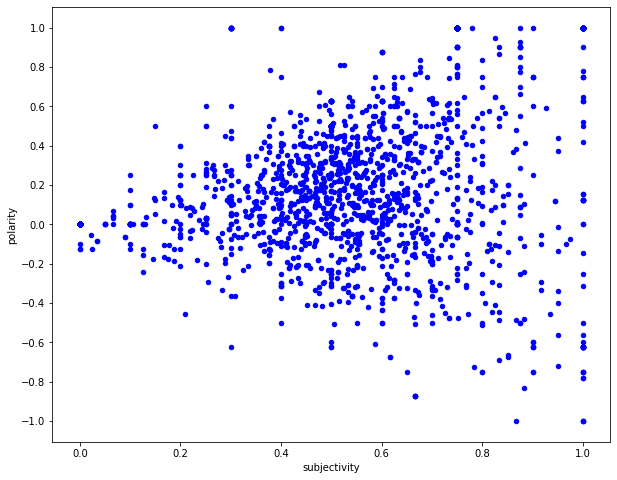

In [77]:
all_tweets_df.plot(kind='scatter',x='subjectivity',y='polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

#### This looks at sentiment over time. It is surprising how many are at zero sentiment

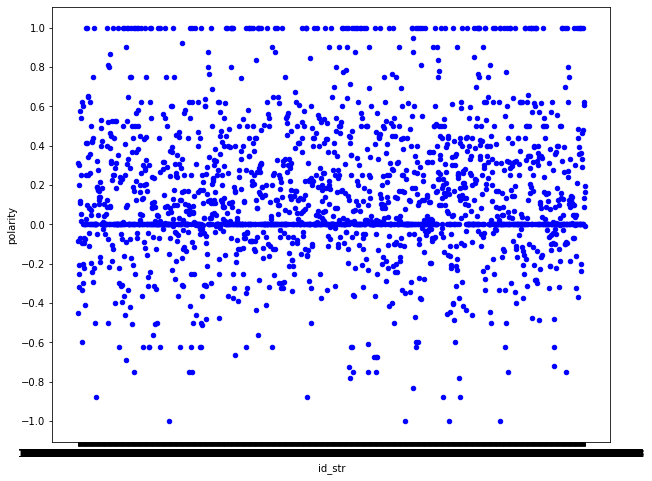

In [80]:
all_tweets_df.plot(kind='scatter',x='id_str',y='polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

## Scatterplots - Vader

In [91]:
sid = SentimentIntensityAnalyzer()
vader_sent = lambda x: sid.polarity_scores(x)['compound']

tweets_cleaned_df['vader_sentiment'] = tweets_cleaned_df['text'].apply(vader_sent)
all_tweets_df['vader_sentiment'] = all_tweets_df['text'].apply(vader_sent)


### Coronavirus related tweets

#### Vader Sentiment over time, looks random

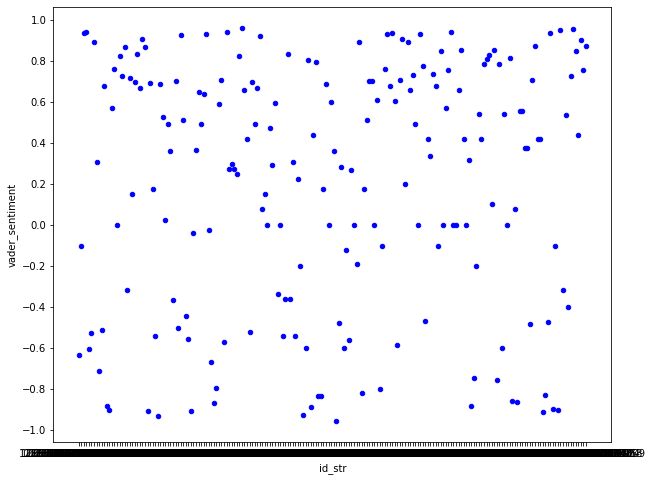

In [86]:
tweets_cleaned_df.plot(kind='scatter',x='id_str',y='vader_sentiment',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

#### All Trump Tweets with Vader

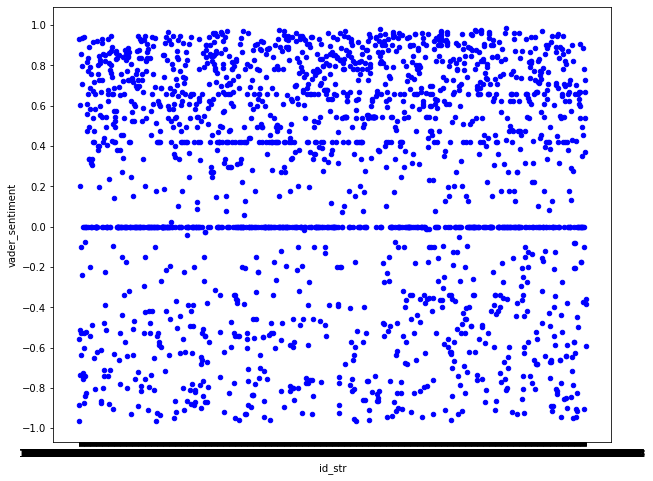

In [92]:

all_tweets_df.plot(kind='scatter',x='id_str',y='vader_sentiment',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()